In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster



In [4]:
df_original = pd.read_csv('df_eth_usd.csv')
df_original.drop(['Unnamed: 0', 'timestamp.1'], axis= 1, inplace=True  )

In [5]:
df_original.head()

,timestamp,open,high,low,close,volume,exchange_id,knowledge_timestamp,currency_pair,year,month
0,2019-11-27 07:45:00+00:00,146.0,146.0,146.0,146.0,0.01,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11
1,2019-11-27 07:46:00+00:00,146.0,146.0,146.0,146.0,0.00,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11
2,2019-11-27 07:47:00+00:00,146.0,146.0,146.0,146.0,0.00,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11
3,2019-11-27 07:48:00+00:00,146.0,146.0,146.0,146.0,0.00,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11
4,2019-11-27 07:49:00+00:00,146.0,146.0,146.0,146.0,0.00,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11


In [6]:
df = df_original.copy()

In [7]:
df['return'] = (df['close'].shift(1) - df['close'].shift(0)) -  df['close'].shift(0)


In [8]:
df.head()

,timestamp,open,high,low,close,volume,exchange_id,knowledge_timestamp,currency_pair,year,month,return
0,2019-11-27 07:45:00+00:00,146.0,146.0,146.0,146.0,0.01,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,NaN
1,2019-11-27 07:46:00+00:00,146.0,146.0,146.0,146.0,0.00,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-146.0
2,2019-11-27 07:47:00+00:00,146.0,146.0,146.0,146.0,0.00,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-146.0
3,2019-11-27 07:48:00+00:00,146.0,146.0,146.0,146.0,0.00,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-146.0
4,2019-11-27 07:49:00+00:00,146.0,146.0,146.0,146.0,0.00,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-146.0


In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,timestamp,open,high,low,close,volume,exchange_id,knowledge_timestamp,currency_pair,year,month,return
1,2019-11-27 07:46:00+00:00,146.0,146.0,146.0,146.0,0.0,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-146.0
2,2019-11-27 07:47:00+00:00,146.0,146.0,146.0,146.0,0.0,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-146.0
3,2019-11-27 07:48:00+00:00,146.0,146.0,146.0,146.0,0.0,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-146.0
4,2019-11-27 07:49:00+00:00,146.0,146.0,146.0,146.0,0.0,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-146.0
5,2019-11-27 07:50:00+00:00,146.0,146.0,146.0,146.0,0.0,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-146.0


In [117]:

# to calculate volatility, use rolling standard deviation of returns over a window of 30
df['volatility'] = df['return'].rolling(window=30).std()



In [118]:
df.dropna(inplace=True)
df.head()


,timestamp,open,high,low,close,volume,exchange_id,knowledge_timestamp,currency_pair,year,month,return,volatility
422,2019-11-27 14:47:00+00:00,147.36,147.39,147.15,147.38,156.88,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-147.38,0.276654
423,2019-11-27 14:48:00+00:00,147.37,147.37,147.15,147.37,178.35,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-147.36,0.257222
424,2019-11-27 14:49:00+00:00,147.33,147.52,147.15,147.52,191.36,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-147.67,0.263226
425,2019-11-27 14:50:00+00:00,147.50,147.52,147.15,147.39,210.14,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-147.26,0.250009
426,2019-11-27 14:51:00+00:00,147.40,147.42,147.33,147.33,207.07,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-147.27,0.250193


In [119]:
df['volatility'].describe()

count    191236.000000
mean          0.696075
std           1.356586
min           0.000000
25%           0.224289
50%           0.429775
75%           0.843902
max         102.994458
Name: volatility, dtype: float64

In [120]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [121]:
k = 5

# Create a copy of the original dataframe
df_volatility = df.copy()
df_volatility.rename(columns= {'volatility' : 'y'}, inplace=True)

# Shift the close price k times to create the lagged features
for i in range(1, k+1):
    col_name = f'x_{i}'
    df_volatility[col_name] = df_volatility['y'].shift(i)

# Drop the rows with missing values
df_volatility.dropna(inplace=True)

# Reorder the columns
cols = ['timestamp', 'y'] + [f'x_{i}' for i in range(1, k+1)]
df_volatility = df_volatility[cols]

# Reset the index
df_volatility.reset_index(drop=True, inplace=True)

In [122]:
df_volatility

,timestamp,y,x_1,x_2,x_3,x_4,x_5
0,2019-11-27 14:52:00+00:00,0.253032,0.250193,0.250009,0.263226,0.257222,0.276654
1,2019-11-27 14:53:00+00:00,0.253304,0.253032,0.250193,0.250009,0.263226,0.257222
2,2019-11-27 14:54:00+00:00,0.256589,0.253304,0.253032,0.250193,0.250009,0.263226
3,2019-11-27 14:55:00+00:00,0.227399,0.256589,0.253304,0.253032,0.250193,0.250009
4,2019-11-27 14:56:00+00:00,0.216882,0.227399,0.256589,0.253304,0.253032,0.250193
...,...,...,...,...,...,...,...
191226,2020-12-07 09:59:00+00:00,0.840208,0.890484,0.911825,0.894032,0.858832,0.820283
191227,2020-12-07 10:00:00+00:00,0.856494,0.840208,0.890484,0.911825,0.894032,0.858832
191228,2020-12-07 10:01:00+00:00,0.838512,0.856494,0.840208,0.890484,0.911825,0.894032
191229,2020-12-07 10:02:00+00:00,0.838211,0.838512,0.856494,0.840208,0.890484,0.911825


In [123]:
df_volatility.nunique()

timestamp    191231
y            190696
x_1          190696
x_2          190696
x_3          190696
x_4          190696
x_5          190696
dtype: int64

In [124]:
df_timestamp_3m = df_volatility.sort_values(by="timestamp",ascending=True).set_index("timestamp").last("3M")

In [125]:
df

,timestamp,open,high,low,close,volume,exchange_id,knowledge_timestamp,currency_pair,year,month,return,volatility
422,2019-11-27 14:47:00+00:00,147.36,147.39,147.15,147.38,156.880,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-147.38,0.276654
423,2019-11-27 14:48:00+00:00,147.37,147.37,147.15,147.37,178.350,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-147.36,0.257222
424,2019-11-27 14:49:00+00:00,147.33,147.52,147.15,147.52,191.360,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-147.67,0.263226
425,2019-11-27 14:50:00+00:00,147.50,147.52,147.15,147.39,210.140,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-147.26,0.250009
426,2019-11-27 14:51:00+00:00,147.40,147.42,147.33,147.33,207.070,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2019,11,-147.27,0.250193
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191654,2020-12-07 09:59:00+00:00,595.15,595.91,595.14,595.90,668.033,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2020,12,-596.65,0.840208
191655,2020-12-07 10:00:00+00:00,595.90,595.91,595.00,595.13,1136.621,binance,2022-06-24 11:10:10.287766+00:00,ETH_USDT,2020,12,-594.36,0.856494
191656,2020-12-07 10:01:00+00:00,595.13,595.13,594.70,594.91,1050.783,binance,2022-06-24 11:10:10.287766+00:00,ETH_USDT,2020,12,-594.69,0.838512
191657,2020-12-07 10:02:00+00:00,594.92,594.92,594.44,594.82,1339.335,binance,2022-07-09 10:42:47.613115+00:00,ETH_USDT,2020,12,-594.73,0.838211


In [126]:
from scipy import stats

In [138]:

df_timestamp_3m = df_timestamp_3m[df_timestamp_3m['y'] <= 4]


Train dates : 2020-10-01 00:30:00+00:00 --- 2020-11-30 02:28:00+00:00  (n=85440)
Test dates  : 2020-11-30 02:29:00+00:00 --- 2020-12-07 10:03:00+00:00  (n=10080)


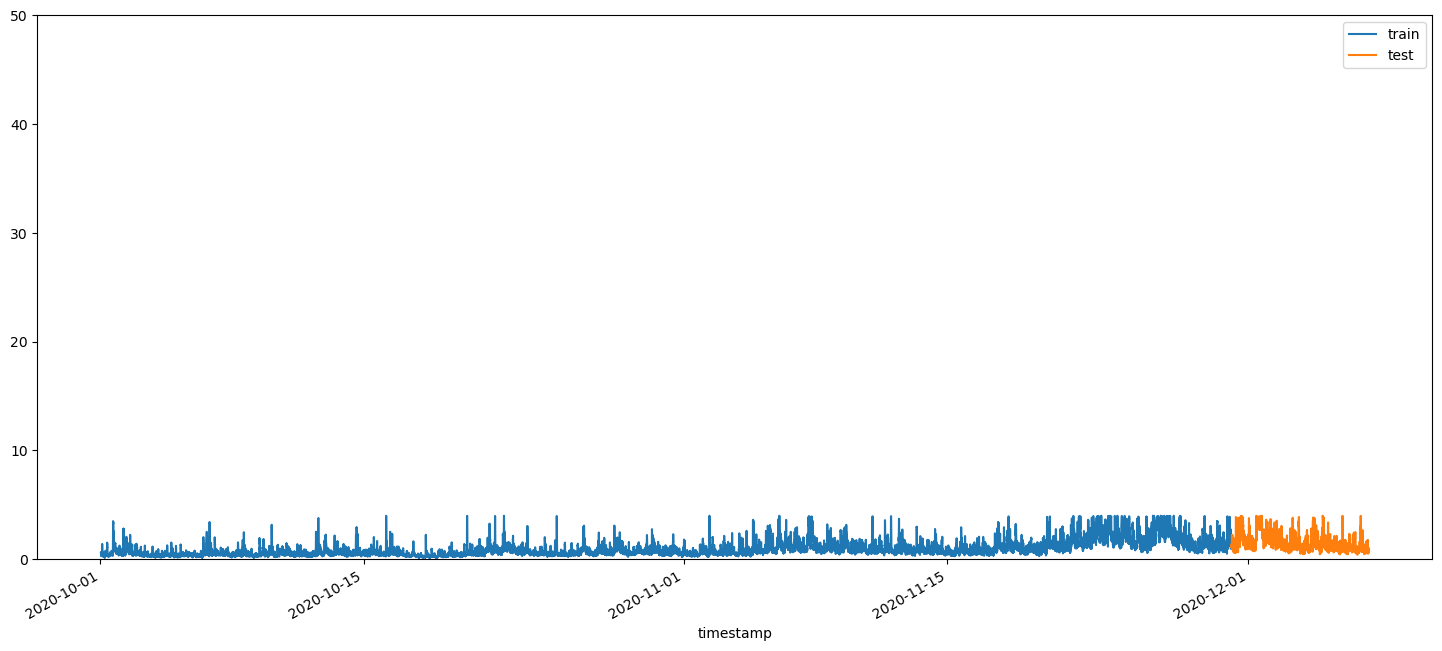

In [139]:
steps = 10080
data_train = df_timestamp_3m[:-steps]
data_test  = df_timestamp_3m[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(18, 8))
ax.set_ylim(0,50)
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
ax.legend();

In [146]:
import statsmodels.api as sm

# Add intercept to X values
data_train = sm.add_constant(data_train)
data_test = sm.add_constant(data_test)

# Fit OLS model on training data
model = sm.OLS(data_train['y'], data_train[['const', 'x_1', 'x_2', 'x_3', 'x_4']])
results = model.fit()

# Predict using test data and print summary statistics
predictions = results.predict(data_test[['const', 'x_1', 'x_2', 'x_3', 'x_4']])
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 6.929e+05
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:24:33   Log-Likelihood:                 64225.
No. Observations:               85440   AIC:                        -1.284e+05
Df Residuals:                   85435   BIC:                        -1.284e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0278      0.001     41.443      0.0

In [141]:
predictions.nunique()

10080

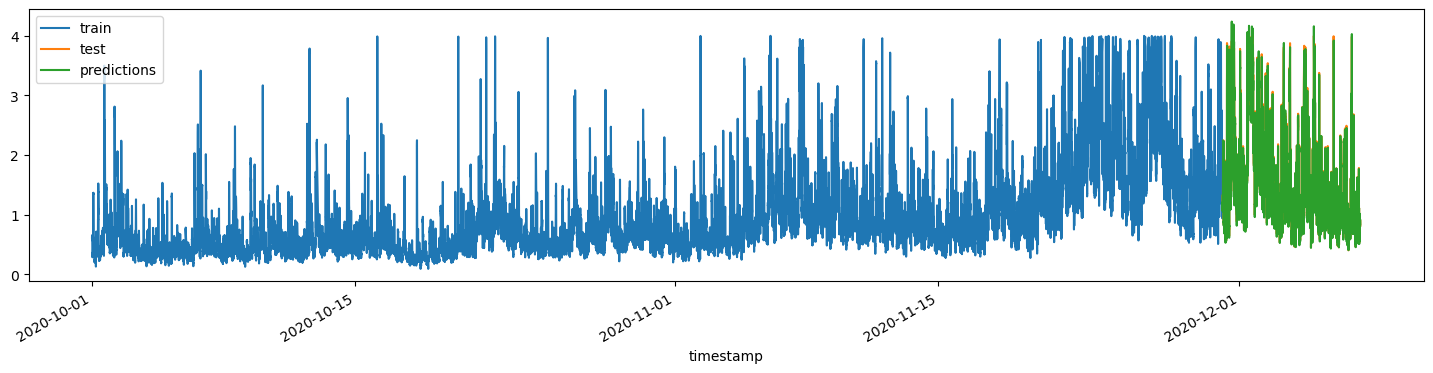

In [147]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(18, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();